In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install torch
!{sys.executable} -m pip install torchvision
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install natsort
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install tensorboardX
!{sys.executable} -m pip install imbalanced-learn
!{sys.executable} -m pip install transformers
!{sys.executable} -m pip install h5py
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install stable-baselines3
!{sys.executable} -m pip install gym
!{sys.executable} -m pip install cloudpickle
!{sys.executable} -m pip install streamlit
!{sys.executable} -m pip install pyngrok
!{sys.executable} -m pip install Flask
!{sys.executable} -m pip pip install sqlite


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Using cached tensorboardX-2.6.2.2-py2.py3-none-any.whl (101 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 88.7 MB/s eta 0

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.applications as applications
import scipy.stats
import streamlit as st
import numpy as np
from flask import Flask, request, jsonify
import sqlite3
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.datasets import cifar10
import cv2
from scipy.ndimage import gaussian_filter
from numpy.random import normal
from tensorflow.keras.regularizers import l2
from google.colab import drive
import subprocess
import time
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model


In [3]:
drive.mount('/content/drive')

! cd drive


Mounted at /content/drive


In [4]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# Split 10% of training data for validation
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1, random_state=42, stratify=train_labels
)


170498071/170498071 [==============================] - 2s 0us/step


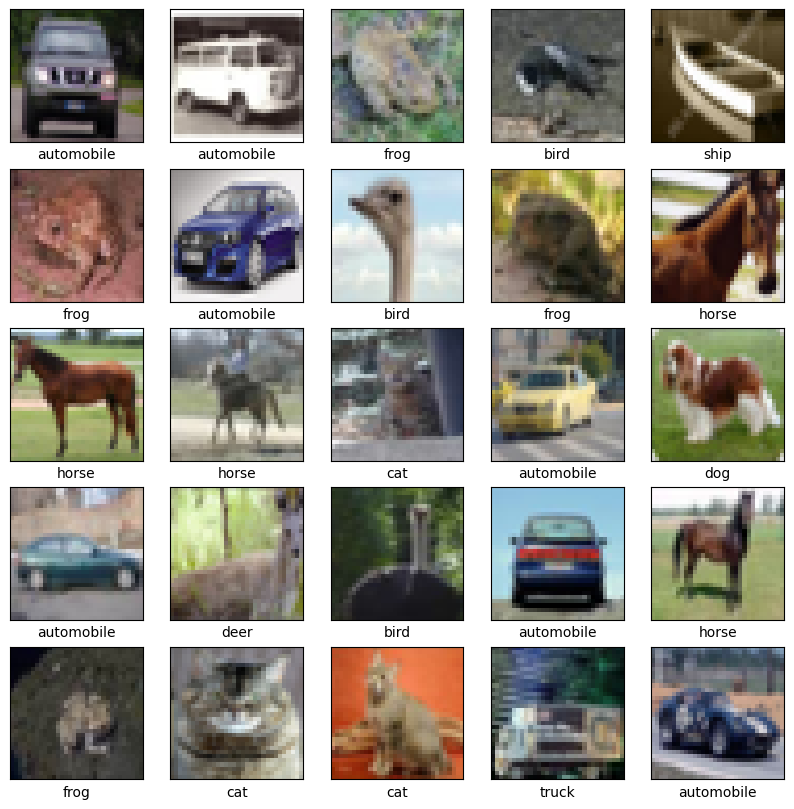

In [5]:
# Before visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # Use class names for labels
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()



In [6]:
# Check the unique values in the training and testing labels to ensure they are correctly encoded
print(np.unique(train_labels))
print(np.unique(test_labels))
print(np.unique(val_labels))



[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [7]:
# Normalize the images
train_images, test_images, val_images = train_images / 255.0, test_images / 255.0, val_images / 255.0


In [8]:
print(f'Training data shape: {train_images.shape}, Labels shape: {train_labels.shape}')
print(f'Validation data shape: {val_images.shape}, Labels shape: {val_labels.shape}')
print(f'Test data shape: {test_images.shape}, Labels shape: {test_labels.shape}')


Training data shape: (45000, 32, 32, 3), Labels shape: (45000, 1)
Validation data shape: (5000, 32, 32, 3), Labels shape: (5000, 1)
Test data shape: (10000, 32, 32, 3), Labels shape: (10000, 1)


In [9]:
# Function to apply Gaussian noise, now with variable std
def add_gaussian_noise(image, mean=0, std=0.1):  # std parameter is now adjustable
    gaussian_noise = np.random.normal(mean, std, image.shape)
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 1)
    return noisy_image

# Function to apply Gaussian blur, with adjustable kernel size
def gaussian_blur(image, kernel_size=3):  # kernel_size parameter is now adjustable
    return gaussian_filter(image, sigma=kernel_size//4)


# Optional
# Data Augmentation with noisy and blurred images
augmented_train_images = np.concatenate([train_images,
                                        add_gaussian_noise(train_images),
                                        gaussian_blur(train_images)], axis=0)
augmented_train_labels = np.concatenate([train_labels, train_labels, train_labels], axis=0)

# Define a single preprocessing function
def custom_augmentation(image):
    augmentation_type = np.random.rand()
    if augmentation_type < 0.3:
        image = add_gaussian_noise(image, mean=0, std=0.05)
    elif augmentation_type < 0.6:
        image = gaussian_blur(image, kernel_size=4)
    return image

# Define image data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=custom_augmentation
)

# No augmentation for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# Define the model with L2 regularization
model = Sequential([
    # Convolutional layer with 32 filters, kernel size 3x3, relu activation and input shape 32x32x3
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2), # Dropout for regularization

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Flattening the convolutional layers output to feed it into dense layers
    Flatten(),

    # Dense layer with 128 units
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax') # Output layer with 10 units for 10 classes
])


In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [12]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='model_best.h5', monitor='val_loss', save_best_only=True),
    LearningRateScheduler(scheduler)
]

# Preparing datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(128)
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(128)



In [ ]:
history = model.fit(
    train_dataset,
    batch_size=128,
    epochs=100,
    validation_data=val_dataset,  # Changed to validation data
    callbacks=[callbacks]
)

In [16]:
root_dir = "/content/drive/"


In [ ]:
model.save(root_dir+"my_model.h5")

In [17]:
# Define class_label at the beginning of your script
class_label = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [ ]:
# Trained model
predictions = model.predict(test_images)


In [ ]:
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
# Compute confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# New code to identify confused classes
num_classes = len(np.unique(test_labels))
for i in range(num_classes):
    for j in range(num_classes):
        if i != j and cm[i][j] > 10:  # Define a threshold for significant confusion
            print(f'Class {i} is often confused with Class {j}: {cm[i][j]} times')


In [ ]:
# New code to visualize misclassified images for confused classes
for i in range(num_classes):
    for j in range(num_classes):
        if i != j and cm[i][j] > 10:  # Reuse the threshold from above
            confused_indices = np.where((test_labels.flatten() == i) & (predicted_labels == j))
            confused_images = test_images[confused_indices][:10]  # Define num_images_to_show
            # Plotting code similar to your existing visualization


In [ ]:
# Quantitative analysis
print(classification_report(test_labels, predicted_labels))


In [ ]:
# Qualitative analysis - manually inspect a subset of misclassified images
predicted_labels = np.argmax(predictions, axis=1)
misclassified_indices = np.where(predicted_labels != test_labels[:, 0])[0]
misclassified_images = test_images[misclassified_indices]
misclassified_predictions = predicted_labels[misclassified_indices]

# Function to analyze color histograms for misclassified images
def analyze_color_histograms(images, true_labels, predicted_labels, num_classes=10):
    # We will store mean color histograms for each class where misclassification occurs
    mean_histograms = {class_id: [] for class_id in range(num_classes)}

    # Calculate histograms for misclassified images
    for image, true_label, pred_label in zip(images, true_labels, predicted_labels):
        if true_label != pred_label:
            # Compute the histogram for each color channel
            color_histograms = [np.histogram(image[:, :, channel], bins=256, range=(0, 1))[0] for channel in range(3)]
            mean_histograms[true_label].append(color_histograms)

    # Average the histograms for each class
    for class_id, histograms in mean_histograms.items():
        if histograms:
            mean_histograms[class_id] = np.mean(histograms, axis=0)

    # Plot the mean color histogram for each class
    for class_id, mean_histogram in mean_histograms.items():
        if len(mean_histogram):  # Here, check if the length of mean_histogram is not zero
            plt.figure(figsize=(10, 4))
            colors = ['red', 'green', 'blue']
            for i, color_histogram in enumerate(mean_histogram):
                plt.plot(color_histogram, color=colors[i])
            plt.title(f'Mean Color Histogram for misclassified class {class_id}')
            plt.show()

# Now call the function using the misclassified data
true_labels_misclassified = test_labels[misclassified_indices, 0]
predicted_labels_misclassified = predicted_labels[misclassified_indices]
analyze_color_histograms(misclassified_images, true_labels_misclassified, predicted_labels_misclassified)


In [ ]:
# Apply distortions to the test images
test_images_distorted_noise = np.array([add_gaussian_noise(img) for img in test_images])
test_images_distorted_blur = np.array([gaussian_blur(img) for img in test_images])

# Evaluate the model on the distorted images
test_loss_noise, test_acc_noise = model.evaluate(test_images_distorted_noise, test_labels, verbose=2)
print('\nTest accuracy with Gaussian noise:', test_acc_noise)
test_loss_blur, test_acc_blur = model.evaluate(test_images_distorted_blur, test_labels, verbose=2)
print('\nTest accuracy with Gaussian blur:', test_acc_blur)


In [ ]:
# Display a few misclassified images
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(misclassified_images[i])
    ax.set_title(f"Pred: {class_label[misclassified_predictions[i]]}, True: {class_label[test_labels[misclassified_indices[i], 0]]}")
plt.tight_layout()
plt.show()


In [ ]:
# Nearest neighbors analysis for a misclassified image
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(train_images.reshape(train_images.shape[0], -1))
distances, indices = nn.kneighbors(misclassified_images.reshape(misclassified_images.shape[0], -1))

# Extend this code to analyze if misclassified images are closer to other classes
for index in misclassified_indices:
    # Get the true label and predicted label
    true_label = test_labels[index][0]
    predicted_label = predicted_labels[index]
    # Get nearest neighbors
    _, neighbors = nn.kneighbors(test_images[index].reshape(1, -1))
    # Check if nearest neighbors are from the predicted class rather than the true class
    neighbor_labels = train_labels[neighbors[0]]
    count_misclass_neighbors = np.count_nonzero(neighbor_labels != true_label)
    print(f'Image {index} true label: {true_label}, predicted: {predicted_label}, misclass neighbors: {count_misclass_neighbors}')


In [ ]:
# Display nearest neighbors for the first misclassified image
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes.flatten()):
    neighbor_img = train_images[indices[0][i]].reshape(32, 32, 3)
    ax.imshow(neighbor_img)
    ax.set_title(f"Label: {class_label[train_labels[indices[0][i]][0]]}")
plt.tight_layout()
plt.show()


In [ ]:
# Compute entropy
entropy = -np.sum(predictions * np.log(predictions + 1e-9), axis=1)  # Adding a small value to avoid log(0)


In [ ]:
# Get indices of top uncertain instances
num_uncertain_instances = 100  # Specify the number of uncertain instances
uncertain_indices = np.argsort(entropy)[-num_uncertain_instances:]
np.save(root_dir+'uncertain_indices.npy', uncertain_indices)


In [ ]:
# Store uncertain instances
uncertain_images = test_images[uncertain_indices]  # Replace `test_images` with your data
# Assuming uncertain_images is a numpy array
np.save(root_dir+'uncertain_images.npy', uncertain_images)


In [ ]:
%%writefile app.py

import streamlit as st
import numpy as np
import requests

# Allow the user to input the Flask app's tunnel URL dynamically
flask_tunnel_url = st.text_input("Enter the Flask app's localtunnel URL:").strip()

# Function to send labeled data to the Flask server
def send_label_to_server(image_index, label, flask_tunnel_url):
    url = f"{flask_tunnel_url}/submit_label"
    data = {'image_id': image_index, 'label': label}
    response = requests.post(url, json=data)
    if response.status_code == 200:
        st.success('Label submitted successfully.')
    else:
        st.error('Failed to submit label. Server responded with status code: ' + str(response.status_code))

# Uncertain_images and uncertain_indices
# ...
uncertain_images = np.load('/content/drive/uncertain_images.npy')

# Rescale images back to [0, 255] and convert to uint8
uncertain_images = (uncertain_images * 255).astype(np.uint8)

class_label = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

st.title("Interactive Labeling Interface")

# Use session state to keep track of the index
if 'index' not in st.session_state:
    st.session_state.index = 0

index = st.number_input('Enter the index of image to label (0-99):', value=st.session_state.index, step=1)

if st.button('Previous'):
    st.session_state.index = (st.session_state.index - 1) % 100
    index = st.session_state.index
if st.button('Next'):
    st.session_state.index = (st.session_state.index + 1) % 100
    index = st.session_state.index

st.image(uncertain_images[index], caption=f'Image at Index {index}', width=64, output_format='PNG')

label = st.selectbox('Select the correct label:', class_label)

if st.button('Submit'):
    send_label_to_server(index, label, flask_tunnel_url)


In [ ]:
# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('labels.db')
c = conn.cursor()

# Create a new table to store image labels
# c.execute('''
#           CREATE TABLE image_labels
#           (id INTEGER PRIMARY KEY,
#           label TEXT)
#           ''')
# conn.commit()


In [ ]:
%%writefile server.py

from flask import Flask, request, jsonify
import numpy as np
import sqlite3

app = Flask(__name__)

uncertain_images = np.load('/content/drive/uncertain_images.npy')
uncertain_indices = np.load('/content/drive/uncertain_indices.npy')
labeled_indices = set()

def get_next_uncertain_image():
    for idx, image in zip(uncertain_indices, uncertain_images):
        if idx not in labeled_indices:
            return image, idx
    return None, None  # No more images to label


def save_label(image_id, label):
    # Save the label to your database
    c.execute('''
              INSERT INTO image_labels (id, label)
              VALUES (?, ?)''', (image_id, label))
    conn.commit()


@app.route('/get_image', methods=['GET'])
def get_image():
    # Assume we have a function `get_next_uncertain_image()` to get the next image for labeling
    image, image_id = get_next_uncertain_image()
    return jsonify({'image': image.tolist(), 'image_id': int(image_id)})  # Convert image_id to int

def get_db_connection():
    conn = sqlite3.connect('labels.db')
    conn.row_factory = sqlite3.Row
    return conn

@app.route('/submit_label', methods=['POST'])
def submit_label():
    data = request.json
    image_id = data['image_id']
    label = data['label']

    conn = sqlite3.connect('labels.db')
    c = conn.cursor()

    # Error handling for duplicate labels
    c.execute('SELECT * FROM image_labels WHERE id = ?', (image_id,))
    if c.fetchone():
        conn.close()
        return jsonify({'error': 'Label for this image already exists'}), 400

    # Insert the label into the database
    c.execute('INSERT INTO image_labels (id, label) VALUES (?, ?)', (image_id, label))
    conn.commit()
    conn.close()
    return jsonify({'success': True})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


In [ ]:
# Run this in a cell by itself to start the Streamlit app in the background
!nohup streamlit run app.py &


In [ ]:
!nohup python server.py &


In [ ]:
# Start the localtunnel for Streamlit app and capture the output
lt_process_streamlit = subprocess.Popen(['npx', 'localtunnel', '--port', '8501'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
out_streamlit, err_streamlit = lt_process_streamlit.communicate()
streamlit_url = out_streamlit.decode().strip()
print(f"Streamlit app localtunnel URL: {streamlit_url}")

# Start the localtunnel for Flask app and capture the output
lt_process_flask = subprocess.Popen(['npx', 'localtunnel', '--port', '5000'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
out_flask, err_flask = lt_process_flask.communicate()
flask_url = out_flask.decode().strip()
print(f"Flask app localtunnel URL: {flask_url}")



In [ ]:
# First, in a cell, run this command to start the Streamlit app
# !streamlit run app.py &>/dev/null&
# In a cell, run this command to start the Streamlit app

# Start the Streamlit app in the background
process = subprocess.Popen(["streamlit", "run", "app.py"])

# Give Streamlit a moment to start up
time.sleep(5)  # Sleep for 5 seconds


In [ ]:
!npm install localtunnel


In [34]:
!streamlit run app.py &>/content/logs.txt &


In [35]:
!nohup streamlit run app.py &


nohup: appending output to 'nohup.out'


In [ ]:
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com


In [ ]:
# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('labels.db')
c = conn.cursor()

# Create a new table to store image labels
c.execute('''
          CREATE TABLE image_labels
          (id INTEGER PRIMARY KEY,
          label TEXT)
          ''')
conn.commit()


In [ ]:
%%writefile server.py

from flask import Flask, request, jsonify
import numpy as np
import sqlite3

app = Flask(__name__)

uncertain_images = np.load('/content/drive/uncertain_images.npy')
uncertain_indices = np.load('/content/drive/uncertain_indices.npy')
labeled_indices = set()

def get_next_uncertain_image():
    for idx, image in zip(uncertain_indices, uncertain_images):
        if idx not in labeled_indices:
            return image, idx
    return None, None  # No more images to label


def save_label(image_id, label):
    # Save the label to your database
    c.execute('''
              INSERT INTO image_labels (id, label)
              VALUES (?, ?)''', (image_id, label))
    conn.commit()


@app.route('/get_image', methods=['GET'])
def get_image():
    # Assume we have a function `get_next_uncertain_image()` to get the next image for labeling
    image, image_id = get_next_uncertain_image()
    return jsonify({'image': image.tolist(), 'image_id': int(image_id)})  # Convert image_id to int

def get_db_connection():
    conn = sqlite3.connect('labels.db')
    conn.row_factory = sqlite3.Row
    return conn

@app.route('/submit_label', methods=['POST'])
def submit_label():
    data = request.json
    image_id = data['image_id']
    label = data['label']

    conn = sqlite3.connect('labels.db')
    c = conn.cursor()

    # Error handling for duplicate labels
    c.execute('SELECT * FROM image_labels WHERE id = ?', (image_id,))
    if c.fetchone():
        conn.close()
        return jsonify({'error': 'Label for this image already exists'}), 400

    # Insert the label into the database
    c.execute('INSERT INTO image_labels (id, label) VALUES (?, ?)', (image_id, label))
    conn.commit()
    conn.close()
    return jsonify({'success': True})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


Overwriting server.py


In [ ]:
# Run this in another cell by itself to start the Flask app in the background
!nohup python server.py &

In [ ]:
# Expose the Streamlit app with localtunnel
!npx localtunnel --port 8501

In [ ]:
# Expose the Flask app with localtunnel in another cell
!npx localtunnel --port 5000

In [ ]:
# In a cell, run this command to start the Streamlit app

# Start the Streamlit app in the background
process = subprocess.Popen(["python", "server.py"])

# Give Streamlit a moment to start up
time.sleep(5)  # Sleep for 5 seconds


In [ ]:
!npx localtunnel --port 5000 & curl ipv4.icanhazip.com


In [ ]:
!nohup streamlit run app.py &


nohup: appending output to 'nohup.out'


In [ ]:
def save_label(image_id, label):
    c.execute('''
              INSERT INTO image_labels (id, label)
              VALUES (?, ?)''', (image_id, label))
    conn.commit()

def get_labeled_data():
    c.execute('''
              SELECT * FROM image_labels
              ''')
    return c.fetchall()

def save_label(image_id, label):
    c.execute('''
              INSERT INTO image_labels (id, label)
              VALUES (?, ?)''', (image_id, label))
    conn.commit()

@app.route('/submit_label', methods=['POST'])
def submit_label():
    data = request.json
    image_id = data['image_id']
    label = data['label']
    save_label(image_id, label)  # Save label to the database
    return jsonify({'success': True})
